# COMP47670 Assignment 1 Task 02

### This assignment contains, analysis of my favourite youtuber "Flying Beast" and analysing the information according various parameters using youtube data via youtube API: "https://developers.google.com/youtube/v3 "

#### This notebook contains Data preparation and analysis of data which we collected in Part 1.

#### Task 2: Data preparation and analysis

In [1]:
# import all libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
# reading data from csv.
DataFrame = pd.read_csv('videoData.csv')
DataFrame

,ID,Title,Description,Tags,CategoryId,Duration,Published_Date,Total_Views,Total_Likes,Favorite_Count,Total_Comments
0,Pjpml-4H9Q0,"IND v SA, Perth Australia T20 WC 2022","Vlog # 268\nIndia take on South Africa, in the...",25,22,PT20M31S,2022-11-01T04:00:19Z,1300673,98088,0,2659
1,x6ABTsj3JGk,"Virat Kohli Controversy Happened Here - Perth,...",Vlog # 267\n\nGaurav's Instagram https://www.i...,25,22,PT8M7S,2022-10-31T12:10:06Z,1378217,114559,0,2263
2,zN7BF-3pKts,Tour of ICC Hospitality Box | T20 World Cup Pe...,"Vlog # 266\ntour of the ICC hospitality box, a...",25,22,PT2M40S,2022-10-31T06:23:30Z,717841,53280,0,863
3,dl33HaRm7U8,Australian Kangaroo 🦘,NaN,0,22,PT11M43S,2022-10-30T06:14:29Z,920221,69118,0,1902
4,AhyTclKkqxU,Exclusive Coverage before Team India's Match,Vlog # 264\n#t20worldcup @ICC \n\nGaurav's In...,25,22,PT10M44S,2022-10-28T14:35:30Z,1438942,101104,0,2026
...,...,...,...,...,...,...,...,...,...,...,...
1241,hdNcDaMmba4,Mc Donald's challenge,"VLOG# 5, Mac Donald's challange. Cheat day \nF...",24,22,PT11M33S,2017-12-23T03:30:01Z,3515927,135818,0,3378
1242,cw87TYg71GA,"Waise to Mein bahut sakth Ladka hoon, Lekin .....","VLOG#4\n\nA fun vlog, me and ritu attending a ...",29,22,PT8M49S,2017-12-21T03:30:01Z,6441268,247271,0,5624
1243,qM1OtmE3Njo,DANCING CAR to IIT Kanpur,Follow me on instagram @taneja.gaurav\n\nIf yo...,24,22,PT10M32S,2017-12-19T03:30:00Z,2028429,75328,0,1983
1244,mMrM_mg_sxc,Vaishno Devi to Niagara Falls | She is still u...,Follow me on instagram @taneja.gaurav\n\nIf yo...,35,22,PT8M49S,2017-12-15T03:30:00Z,1737659,66670,0,1405


#### Data Preprocessing

In [3]:
# checking dataframe information.
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1246 non-null   object
 1   Title           1246 non-null   object
 2   Description     1242 non-null   object
 3   Tags            1246 non-null   int64 
 4   CategoryId      1246 non-null   int64 
 5   Duration        1246 non-null   object
 6   Published_Date  1246 non-null   object
 7   Total_Views     1246 non-null   int64 
 8   Total_Likes     1246 non-null   int64 
 9   Favorite_Count  1246 non-null   int64 
 10  Total_Comments  1246 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 107.2+ KB


In [4]:
# finding if there's any nan value in all the features of dataframe.
DataFrame.isna().sum()

ID                0
Title             0
Description       4
Tags              0
CategoryId        0
Duration          0
Published_Date    0
Total_Views       0
Total_Likes       0
Favorite_Count    0
Total_Comments    0
dtype: int64

In [5]:
# found 4 nan values in description, we remove those records from dataframe.
DataFrame.dropna(subset=['Description'], inplace=True)

In [6]:
# after removing, NaN values from description
print(DataFrame.isna().sum())
print('Shape of the dataframe is:', DataFrame.shape)

ID                0
Title             0
Description       0
Tags              0
CategoryId        0
Duration          0
Published_Date    0
Total_Views       0
Total_Likes       0
Favorite_Count    0
Total_Comments    0
dtype: int64
Shape of the dataframe is: (1242, 11)


In [7]:
# Checking for duplicate records
print('Total Duplicate records in data frame:',DataFrame.duplicated().sum())

Total Duplicate records in data frame: 0


#### Since we have remove NaN values from data set and there's no duplicate records also, we can go ahead for data preparation for analysis.

#### Preparing Data: Duration Feature Updates to Duration_InMinutes

In [8]:
# Converting Duration data in proper format in minutes.
# importing regular expression to match and extract the values.
import re

# defining method to convert duration into minutes
def YouTubeDurationToMinutes(duration):
    '''
        input:
            duration: time duration in youtube generated format. ex : PT20M31S
        output:
            durationInMin: total video duration in minutes.
    '''
    
    # print(duration)
    # mataching the pattern and removing PT, H, M and S from duration and grouping them.
    match = re.match('P?T?((\d+)H)?((\d+)M)?((\d+)S)?', duration).groups()
    # storing value of Hours if present else store value 0.
    hours = int(match[1]) if match[1] else 0
    # storing value of minutes if present else store value 0.
    minutes = int(match[3]) if match[3] else 0
    # storing value of seconds if present else store value 0.
    seconds = int(match[5]) if match[5] else 0
    
    # calculating the values of minutes and rounding off.
    durationInMin = round(hours * 3600 + minutes + seconds / 60, 2)
    return durationInMin

In [9]:
# converting Duration in min using map method and passing custom function (YouTubeDurationToMinutes).
DataFrame['Duration_InMinutes'] = DataFrame['Duration'].map(lambda x:YouTubeDurationToMinutes(x))

In [10]:
# Dropping Duration column from data frame since we already extracted the duration in minutes.
DataFrame.drop(['Duration'], axis=1, inplace=True)
DataFrame

,ID,Title,Description,Tags,CategoryId,Published_Date,Total_Views,Total_Likes,Favorite_Count,Total_Comments,Duration_InMinutes
0,Pjpml-4H9Q0,"IND v SA, Perth Australia T20 WC 2022","Vlog # 268\nIndia take on South Africa, in the...",25,22,2022-11-01T04:00:19Z,1300673,98088,0,2659,20.52
1,x6ABTsj3JGk,"Virat Kohli Controversy Happened Here - Perth,...",Vlog # 267\n\nGaurav's Instagram https://www.i...,25,22,2022-10-31T12:10:06Z,1378217,114559,0,2263,8.12
2,zN7BF-3pKts,Tour of ICC Hospitality Box | T20 World Cup Pe...,"Vlog # 266\ntour of the ICC hospitality box, a...",25,22,2022-10-31T06:23:30Z,717841,53280,0,863,2.67
4,AhyTclKkqxU,Exclusive Coverage before Team India's Match,Vlog # 264\n#t20worldcup @ICC \n\nGaurav's In...,25,22,2022-10-28T14:35:30Z,1438942,101104,0,2026,10.73
5,esLZFVlO_fE,"Melbourne to Sydney , 10 hr Automatic Driving",Vlog # 263\n\nGaurav's Instagram https://www.i...,25,22,2022-10-28T03:46:55Z,1209332,79308,0,1676,8.78
...,...,...,...,...,...,...,...,...,...,...,...
1241,hdNcDaMmba4,Mc Donald's challenge,"VLOG# 5, Mac Donald's challange. Cheat day \nF...",24,22,2017-12-23T03:30:01Z,3515927,135818,0,3378,11.55
1242,cw87TYg71GA,"Waise to Mein bahut sakth Ladka hoon, Lekin .....","VLOG#4\n\nA fun vlog, me and ritu attending a ...",29,22,2017-12-21T03:30:01Z,6441268,247271,0,5624,8.82
1243,qM1OtmE3Njo,DANCING CAR to IIT Kanpur,Follow me on instagram @taneja.gaurav\n\nIf yo...,24,22,2017-12-19T03:30:00Z,2028429,75328,0,1983,10.53
1244,mMrM_mg_sxc,Vaishno Devi to Niagara Falls | She is still u...,Follow me on instagram @taneja.gaurav\n\nIf yo...,35,22,2017-12-15T03:30:00Z,1737659,66670,0,1405,8.82


#### Preparing Data: Published_Date into Published_Date and Published_Time

In [11]:
# Converting Published_Date into Published_Date and Published_Time
import datetime
def convertIntoDateTimeFormat(dateTime, date = False, time = False):
    '''
        input:
            dateTime: date/time type value as containing date and time both. ex: 2022-11-01T04:00:19Z
            date: accepts as boolean, used to return if only date is required
            time: accepts as boolean, used to return if only time is required
        output:
            DateTime: returns list containing both date and time at position 0 and 1 respectively
            DateTime[0]: returns only date.
            DateTime[1]: returns only time.
            
    '''
    # storing date and time after striping using datetime strptime method.
    value = datetime.datetime.strptime(dateTime, "%Y-%m-%dT%H:%M:%SZ")
    # converting value to string data type and then spliting date and time into list
    dateTime = str(value).split(" ")
    # checking condition if users only need date or time or both.
    if date:
        return dateTime[0] # returns Date
    elif time:
        return dateTime[1] # returns time
    else:
        return dateTime # return date time both in list

In [12]:
# Segregating Published date and time into two different features.
DataFrame['Date_Published'] = DataFrame['Published_Date'].map(lambda x:convertIntoDateTimeFormat(x, date = True))
DataFrame['Time_Published'] = DataFrame['Published_Date'].map(lambda x:convertIntoDateTimeFormat(x, time = True))

In [13]:
# Droping Published_Date from data frame as it not required.
DataFrame.drop(['Published_Date'], axis=1, inplace=True)
DataFrame

,ID,Title,Description,Tags,CategoryId,Total_Views,Total_Likes,Favorite_Count,Total_Comments,Duration_InMinutes,Date_Published,Time_Published
0,Pjpml-4H9Q0,"IND v SA, Perth Australia T20 WC 2022","Vlog # 268\nIndia take on South Africa, in the...",25,22,1300673,98088,0,2659,20.52,2022-11-01,04:00:19
1,x6ABTsj3JGk,"Virat Kohli Controversy Happened Here - Perth,...",Vlog # 267\n\nGaurav's Instagram https://www.i...,25,22,1378217,114559,0,2263,8.12,2022-10-31,12:10:06
2,zN7BF-3pKts,Tour of ICC Hospitality Box | T20 World Cup Pe...,"Vlog # 266\ntour of the ICC hospitality box, a...",25,22,717841,53280,0,863,2.67,2022-10-31,06:23:30
4,AhyTclKkqxU,Exclusive Coverage before Team India's Match,Vlog # 264\n#t20worldcup @ICC \n\nGaurav's In...,25,22,1438942,101104,0,2026,10.73,2022-10-28,14:35:30
5,esLZFVlO_fE,"Melbourne to Sydney , 10 hr Automatic Driving",Vlog # 263\n\nGaurav's Instagram https://www.i...,25,22,1209332,79308,0,1676,8.78,2022-10-28,03:46:55
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,hdNcDaMmba4,Mc Donald's challenge,"VLOG# 5, Mac Donald's challange. Cheat day \nF...",24,22,3515927,135818,0,3378,11.55,2017-12-23,03:30:01
1242,cw87TYg71GA,"Waise to Mein bahut sakth Ladka hoon, Lekin .....","VLOG#4\n\nA fun vlog, me and ritu attending a ...",29,22,6441268,247271,0,5624,8.82,2017-12-21,03:30:01
1243,qM1OtmE3Njo,DANCING CAR to IIT Kanpur,Follow me on instagram @taneja.gaurav\n\nIf yo...,24,22,2028429,75328,0,1983,10.53,2017-12-19,03:30:00
1244,mMrM_mg_sxc,Vaishno Devi to Niagara Falls | She is still u...,Follow me on instagram @taneja.gaurav\n\nIf yo...,35,22,1737659,66670,0,1405,8.82,2017-12-15,03:30:00


#### Preparing Data: Extracting Month_Published and Year_Published from Date_Published

In [14]:
# Creating year and month published via panda Datetime index.
DataFrame['Year_Published'] = pd.DatetimeIndex(DataFrame['Date_Published']).year
DataFrame['Month_Published'] = pd.DatetimeIndex(DataFrame['Date_Published']).strftime('%B')

In [15]:
DataFrame

,ID,Title,Description,Tags,CategoryId,Total_Views,Total_Likes,Favorite_Count,Total_Comments,Duration_InMinutes,Date_Published,Time_Published,Year_Published,Month_Published
0,Pjpml-4H9Q0,"IND v SA, Perth Australia T20 WC 2022","Vlog # 268\nIndia take on South Africa, in the...",25,22,1300673,98088,0,2659,20.52,2022-11-01,04:00:19,2022,November
1,x6ABTsj3JGk,"Virat Kohli Controversy Happened Here - Perth,...",Vlog # 267\n\nGaurav's Instagram https://www.i...,25,22,1378217,114559,0,2263,8.12,2022-10-31,12:10:06,2022,October
2,zN7BF-3pKts,Tour of ICC Hospitality Box | T20 World Cup Pe...,"Vlog # 266\ntour of the ICC hospitality box, a...",25,22,717841,53280,0,863,2.67,2022-10-31,06:23:30,2022,October
4,AhyTclKkqxU,Exclusive Coverage before Team India's Match,Vlog # 264\n#t20worldcup @ICC \n\nGaurav's In...,25,22,1438942,101104,0,2026,10.73,2022-10-28,14:35:30,2022,October
5,esLZFVlO_fE,"Melbourne to Sydney , 10 hr Automatic Driving",Vlog # 263\n\nGaurav's Instagram https://www.i...,25,22,1209332,79308,0,1676,8.78,2022-10-28,03:46:55,2022,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,hdNcDaMmba4,Mc Donald's challenge,"VLOG# 5, Mac Donald's challange. Cheat day \nF...",24,22,3515927,135818,0,3378,11.55,2017-12-23,03:30:01,2017,December
1242,cw87TYg71GA,"Waise to Mein bahut sakth Ladka hoon, Lekin .....","VLOG#4\n\nA fun vlog, me and ritu attending a ...",29,22,6441268,247271,0,5624,8.82,2017-12-21,03:30:01,2017,December
1243,qM1OtmE3Njo,DANCING CAR to IIT Kanpur,Follow me on instagram @taneja.gaurav\n\nIf yo...,24,22,2028429,75328,0,1983,10.53,2017-12-19,03:30:00,2017,December
1244,mMrM_mg_sxc,Vaishno Devi to Niagara Falls | She is still u...,Follow me on instagram @taneja.gaurav\n\nIf yo...,35,22,1737659,66670,0,1405,8.82,2017-12-15,03:30:00,2017,December


#### Preparing Data: Description trimed down to 50 characters as it has more than 500 characters

In [16]:
# Triming Description values to 50 Characters.
DataFrame['Description'] = DataFrame['Description'].str.slice(0,150)

In [17]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1245
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1242 non-null   object 
 1   Title               1242 non-null   object 
 2   Description         1242 non-null   object 
 3   Tags                1242 non-null   int64  
 4   CategoryId          1242 non-null   int64  
 5   Total_Views         1242 non-null   int64  
 6   Total_Likes         1242 non-null   int64  
 7   Favorite_Count      1242 non-null   int64  
 8   Total_Comments      1242 non-null   int64  
 9   Duration_InMinutes  1242 non-null   float64
 10  Date_Published      1242 non-null   object 
 11  Time_Published      1242 non-null   object 
 12  Year_Published      1242 non-null   int64  
 13  Month_Published     1242 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 145.5+ KB


#### Now we have, preprocessed data for analysis.

#### Data Analysis

### Top 10 Most View Videos 

In [18]:
# to view top 10 records we need to sort the data by Total_Views in descending order.
Top10VideoDetails = DataFrame.sort_values(by='Total_Views', ascending=False).head(10)

In [19]:
Top10VideoDetails

,ID,Title,Description,Tags,CategoryId,Total_Views,Total_Likes,Favorite_Count,Total_Comments,Duration_InMinutes,Date_Published,Time_Published,Year_Published,Month_Published
1166,7DlE8EESsi8,Best Flight as a Captain | Flying Beast,Vlog 63\nmy best flight as a Captain on Airbus...,30,22,18168175,621695,0,8252,10.03,2018-08-25,03:30:00,2018,August
328,QSmlOFvLPeI,John Abraham Shows his Bike Collection,Vlog # 288\n\nGaurav's Instagram https://www.i...,25,22,16673580,965980,0,23290,18.18,2021-11-01,15:17:03,2021,November
1028,OYvnQOpxPpw,This custom made personal gift made her soo em...,"vlog 182,\n\nSo i decided to make this hand mo...",23,22,13620493,722336,0,12538,10.38,2019-06-11,03:30:00,2019,June
1176,tEElPNDUcqE,Our Wedding Day | FlyingBeast,Our Wedding Day\n4th/5th February 2016\n\nBest...,33,22,12444448,558391,0,17760,6.00,2018-07-09,03:30:00,2018,July
1192,PzBAZ7D_AVo,When she went into Labor Pains. Respect Women.,This was the best day of my life. also realise...,34,22,11147663,449605,0,29237,9.43,2018-05-21,11:32:56,2018,May
1223,0omWh7CwdPc,Worst start to a Trip,Vlog # 21\n\ngoing to my hometown kanpur for m...,20,22,11043439,363804,0,10037,14.10,2018-03-02,14:18:35,2018,March
953,BFY3Cvx-yic,Pilot Husband and Wife Flew Behind Each Other ✈️,VLOG 251\nvdo mein galat numbering padi hai......,25,22,10848601,390031,0,10514,14.98,2019-11-01,14:59:10,2019,November
814,zSuDRcu15H0,Reason Behind Suspension from my Pilot Job,"Vlog # 109\nsince soo long, i was going throug...",26,22,10196788,903935,0,81052,27.48,2020-06-15,04:55:48,2020,June
934,s46Xib61AgA,Why Deepika Padukone Didn't Refuse her ?,Vlog # 269\n\nwent to mumbai for the #LokmatAw...,18,22,10049420,476043,0,8059,12.33,2019-12-20,15:57:54,2019,December
1063,IJIaDfi7nM8,Who Flies better? Gaurav vs Ritu in the Cockpi...,VLOG # 149\nso me and Ritu take up this challe...,23,22,9778536,347104,0,12589,12.13,2019-04-14,03:42:18,2019,April


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4616\4290872136.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_1.set_xticklabels(xlabels);


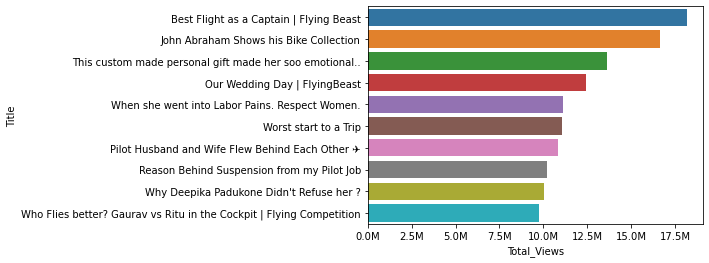

In [20]:
CONST_MILLION = 1000000
plot_1 = sns.barplot(x='Total_Views', y='Title', data=Top10VideoDetails)
xlabels = ['{:,.1f}'.format(x) + 'M' for x in plot_1.get_xticks()/CONST_MILLION]
plot_1.set_xticklabels(xlabels);

##### More than 17.5 million people watched 'Best Flight as a caption' video. In top 10 minimum view is more than 9 million

In [21]:
average_top10VideoView = ((Top10VideoDetails['Total_Views']/CONST_MILLION).sum())/10
print('Average View in Top 10 video is {0:.2f} Millions'.format(average_top10VideoView))

Average View in Top 10 video is 12.40 Millions


In [22]:
(Top10VideoDetails['Total_Views']/CONST_MILLION).describe()

count    10.000000
mean     12.397114
std       2.907724
min       9.778536
25%      10.359741
50%      11.095551
75%      13.326482
max      18.168175
Name: Total_Views, dtype: float64

#### Above details show the min, max, standard deviation, mean of top 10 videos

### Most Frequest Word used in Title

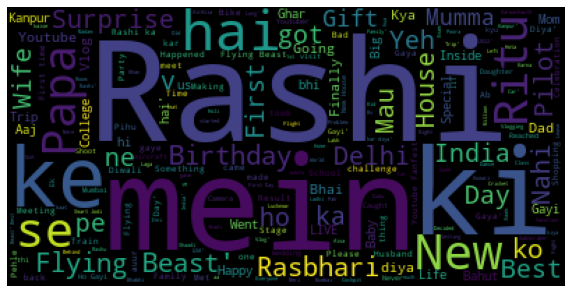

In [23]:
Titletext = [x for x in DataFrame.Title.values]
wordcloud = WordCloud(collocations=True, background_color="black").generate(str(Titletext))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [24]:
titleDict = WordCloud().process_text(str(Titletext))
mostUsedTitle = sorted(titleDict, key=titleDict.get, reverse=True)[:10]
print("Most Used Word in Title are:")
string = ""
for item in mostUsedTitle:
    string += "'" + item + "'" + "," + " "
print(string)

Most Used Word in Title are:
'Rashi', 'mein', 'ki', 'ke', 'hai', 'New', 'se', 'Ritu', 'Papa', 'Flying Beast'', 


#### Most Frequent Word used: 'Rashi', 'mein', 'ki', 'ke', 'hai', 'New', 'se', 'Ritu', 'Papa', 'Flying Beast'

### Most Frequest Word used in Description

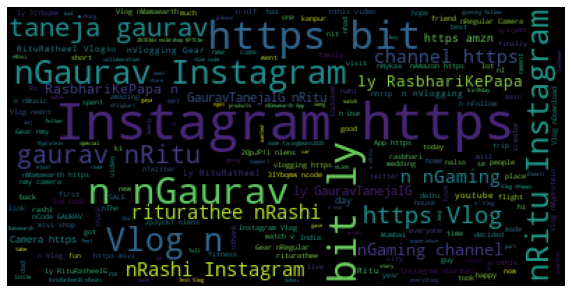

In [25]:
DescriptionText = [x for x in DataFrame.Description.values]
wordcloud = WordCloud(collocations=True, background_color="black").generate(str(DescriptionText))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
descriptionDict = WordCloud().process_text(str(DescriptionText))
mostUsedTitle = sorted(descriptionDict, key=descriptionDict.get, reverse=True)[:10]
print("Most Used Word in Title are:")
string = ""
for item in mostUsedTitle:
    string += "'" + item + "'" + "," + " "
print(string)

Most Used Word in Title are:
'Instagram https', 'bit ly', 'https bit', 'n nGaurav', 'nGaurav Instagram', 'Vlog n', 'nRitu Instagram', 'taneja gaurav', 'gaurav nRitu', 'https Vlog', 


#### Most Frequent Word used: 'Instagram https', 'bit ly', 'https bit', 'n nGaurav', 'nGaurav Instagram', 'Vlog n', 'nRitu Instagram', 'taneja gaurav', 'gaurav nRitu', 'https Vlog'

### Video Uploaded Analysis: Yearly Basis

In [27]:
videos_yearly = DataFrame.groupby("Year_Published",as_index=False).size()

In [28]:
videos_yearly

,Year_Published,size
0,2017,7
1,2018,110
2,2019,201
3,2020,310
4,2021,350
5,2022,264


<AxesSubplot:ylabel='size'>

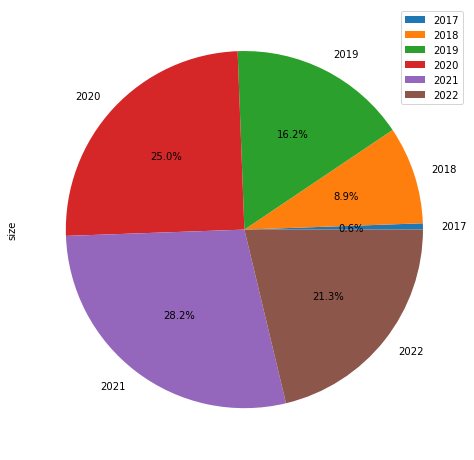

In [29]:
dataForPie = videos_yearly.set_index('Year_Published')
dataForPie.plot.pie(y='size', figsize=(8, 10), autopct='%1.1f%%')

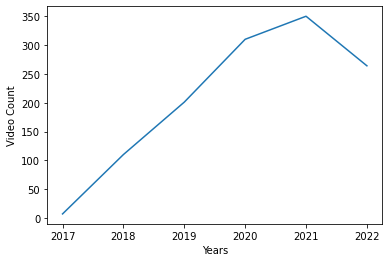

In [30]:
linegraph = sns.lineplot(x="Year_Published", y="size", data=videos_yearly)
linegraph.set(xlabel='Years', ylabel='Video Count')
plt.show()

#### He is very consistent in uploading videos from 2017 to 2021, infact in 2021 he almost uploaded 350 videos, approx one video daily. But in 2022, he is not that consistent although 2022 is not over yet, but it seems 2021 will be all time high.

### Videos Uploaded Analysis: On monthly basis per year after he created Channel.

In [31]:
DataFrame['Date_Published'] = pd.to_datetime(DataFrame['Date_Published'])
videoMonthlyBasisDataSet = DataFrame.groupby(DataFrame['Date_Published'].dt.to_period('M'))["ID"].count().reset_index()

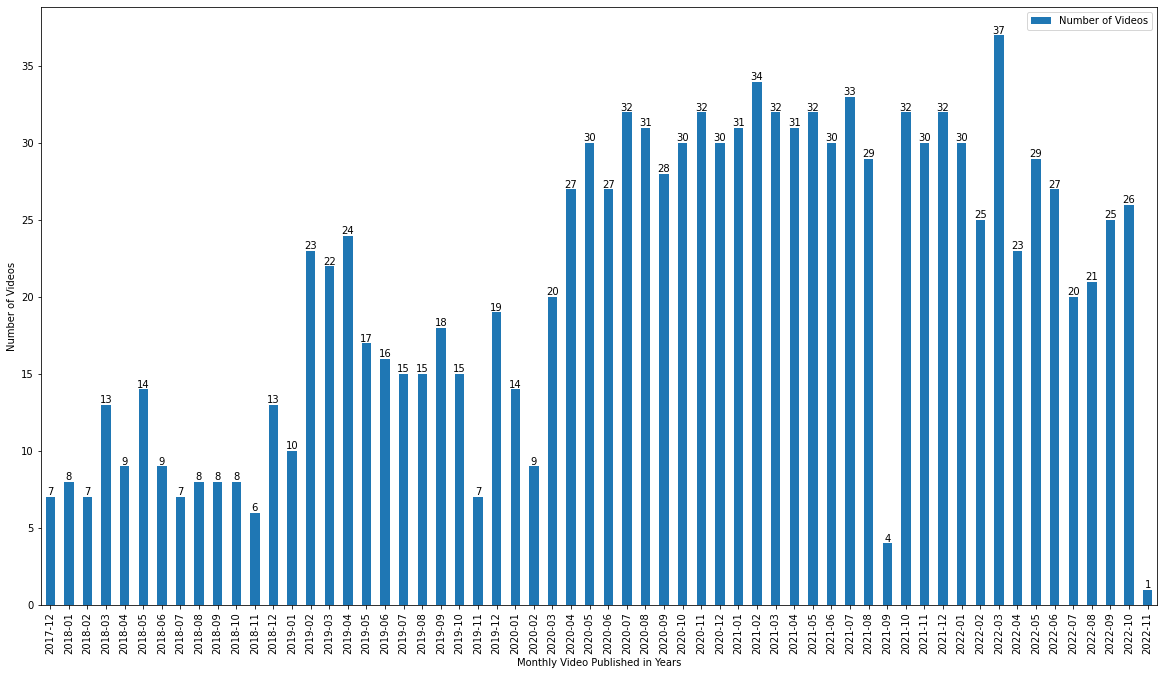

In [32]:
ax = videoMonthlyBasisDataSet.plot.bar(x='Date_Published', y='ID',figsize=(20, 11))
ax.bar_label(ax.containers[0]);
ax.set(xlabel="Monthly Video Published in Years", ylabel="Number of Videos");
ax.legend(["Number of Videos"]);

#### 2022, March month has highest number (37) of upload followed by Feb 2021 by 34. From June 2020 to July 2021 he is uploading almost daily vlogs (videos), He is consistent during this period.


### Videos Uploaded Analysis: Monthly irrespective of year.

In [33]:
videoUploadedMonthly = DataFrame.groupby(DataFrame['Month_Published'])["ID"].count().reset_index()

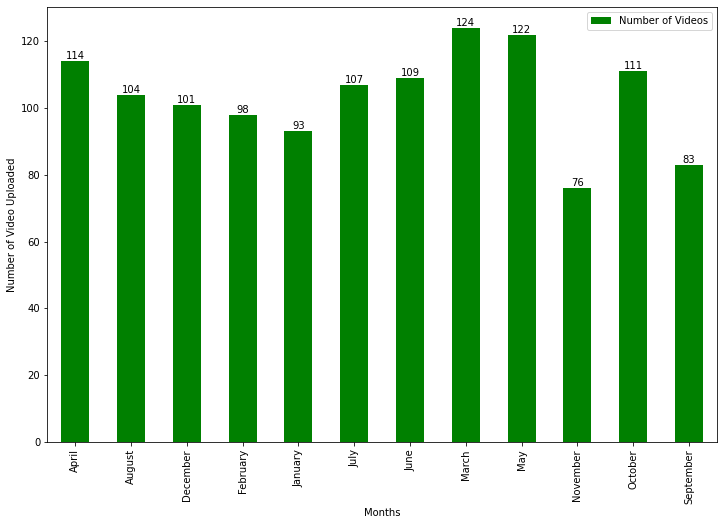

In [34]:
# creating the bar plot
ax = videoUploadedMonthly.plot.bar(x='Month_Published', y='ID',figsize=(12, 8), color='green')
ax.bar_label(ax.containers[0]);
ax.set(xlabel="Months", ylabel="Number of Video Uploaded");
ax.legend(["Number of Videos"]);

#### March and May these two month has highest uploades from year 2017 to 2022, followed by April and October

### Views Analysis: Yearly Basis

In [35]:
# creating formatter to format the values in million so that we have a meaningfull axis tick marks
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

In [36]:
videos_views_yearly = DataFrame.groupby([DataFrame['Year_Published']])['Total_Views'].sum().reset_index()

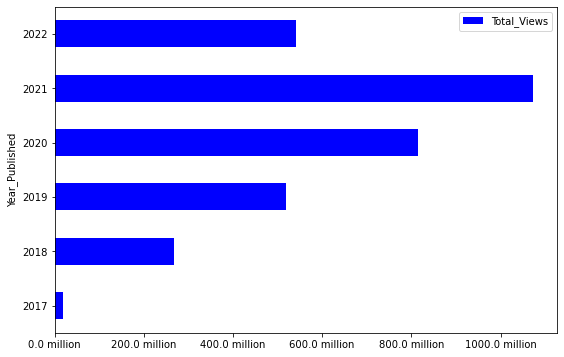

In [37]:
ax = videos_views_yearly.plot.barh(x='Year_Published', y='Total_Views',figsize=(9, 6), color='blue')

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(NullFormatter())

#### as we know from above video upload analysis, we have highest total number videos uploaded in Year 2021, so we have highest number of views in 2021. (Note: For this channel only)
#### So do we consider Number of videos upload in year will have more views in year?

#### We can check comparing yearly total upload and yearly total Views

In [38]:
# creating dataset having total video upload and total views.
Yearly_upload_View_dataFrame = videos_yearly
Yearly_upload_View_dataFrame.rename(columns={"size": "Total_VideoUpload"})
Yearly_upload_View_dataFrame['Total_Views_InMillions'] = (videos_views_yearly['Total_Views']/CONST_MILLION)

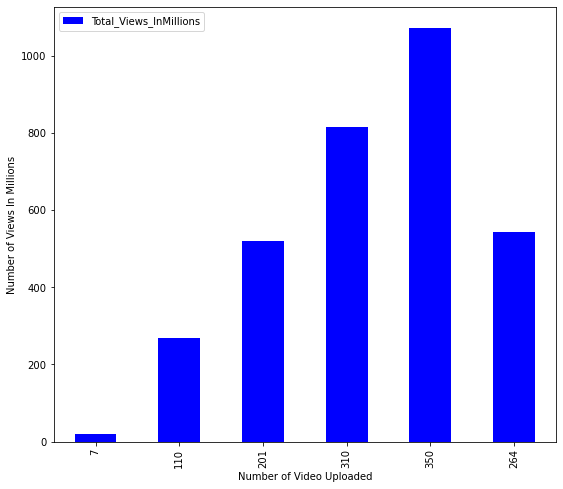

In [39]:
plotGraph = Yearly_upload_View_dataFrame.plot.bar(x='size', y='Total_Views_InMillions',figsize=(9, 8), color='blue')
plotGraph.set(xlabel="Number of Video Uploaded", ylabel="Number of Views In Millions");

#### As we can see with increase in the total upload videos we have more views on videos over the year.

### Tag Analysis: Number of Tags Used in videos

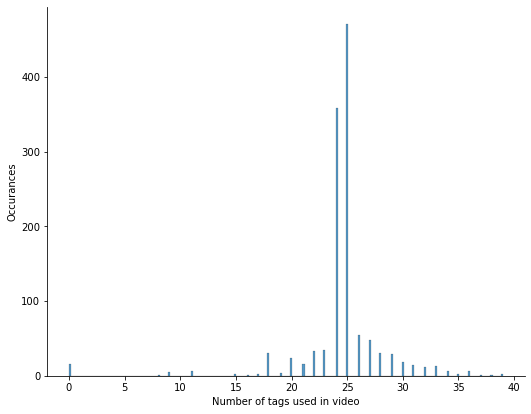

In [40]:
tagChart = sns.displot( DataFrame['Tags'])
tagChart.set(xlabel='Number of tags used in video', ylabel='Occurances')
tagChart.fig.set_size_inches(8,6)

#### 25 tags used over more than 400 videos to get more views, there are very videos (less than 100) has zero tags used. 

In [47]:
DataFrame_Tags_Views = DataFrame[['Tags', 'Year_Published']].copy()

In [49]:
DataFrame_Tags_Views['Total_Views_InMillions'] = (DataFrame['Total_Views']/CONST_MILLION)

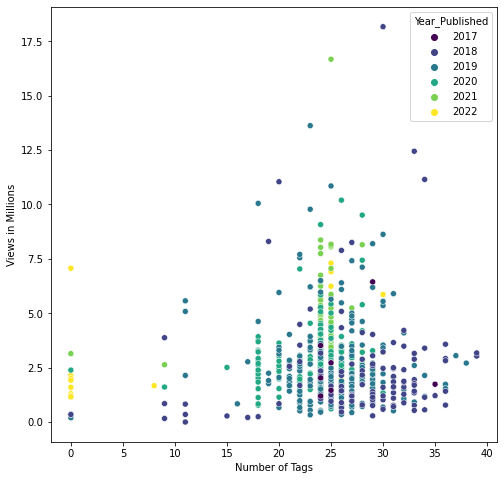

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))
sctrPlot = sns.scatterplot(x='Tags', y='Total_Views_InMillions', hue="Year_Published", data=DataFrame_Tags_Views, ax=ax, palette = "viridis")
sctrPlot.set(xlabel='Number of Tags', ylabel='Views in Millions');

#### Video with more views doesn't have more number of tags, zero tags have avg of 2 million views, that means more tag doesnot provides more views. Majorly this youtuber using those tags which gives his videos an average of 3 million views.

### Likes Analysis: Does more views on provides likes?


In [112]:
# Creating dataframe with total views and totallikes.
DataFrame_Likes_Views = DataFrame[['Total_Likes', 'Year_Published']].copy()
DataFrame_Likes_Views['Total_Likes_InThousands'] = DataFrame['Total_Likes']/1000
DataFrame_Likes_Views['Total_Views_InMillions'] = (DataFrame['Total_Views']/CONST_MILLION)

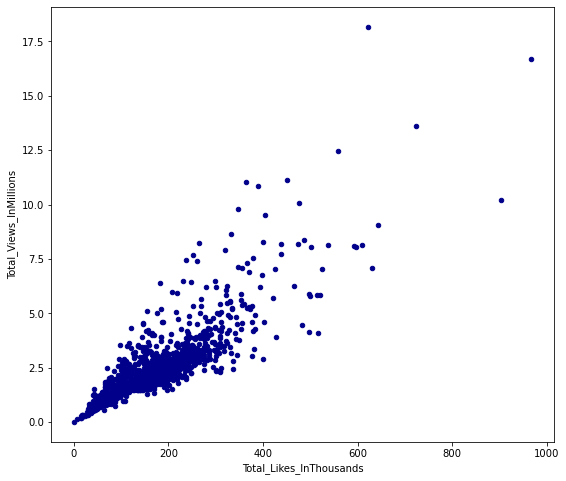

In [115]:
plotSctr = DataFrame_Likes_Views.plot.scatter(x='Total_Likes_InThousands',
                      y='Total_Views_InMillions',
                      c='DarkBlue', figsize=(9, 8))

#### Highest view on video has not the highest likes but has more likes than most of the videos. However, video which has highest likes has second highest view as well.

### Comments Analysis: Does more views on provides more comments?

In [116]:
# Creating dataframe with total views and totallikes.
DataFrame_Comments_Views = DataFrame[['Total_Comments', 'Year_Published']].copy()
DataFrame_Comments_Views['Total_Views_InMillions'] = (DataFrame['Total_Views']/CONST_MILLION)

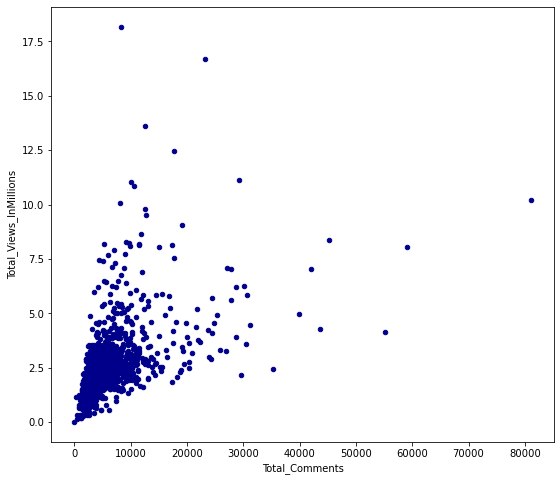

In [119]:
plotSctr = DataFrame_Comments_Views.plot.scatter(x='Total_Comments',
                      y='Total_Views_InMillions',
                      c='DarkBlue', figsize=(9, 8))

#### It's not necessary that more views will provide more comments, video with not good view has more likes.

### Comments vs Likes on video.

In [123]:
# Creating dataframe with total comments and total likes.
DataFrame_Comments_Likes = DataFrame[['Total_Comments']].copy()
DataFrame_Comments_Likes['Total_Likes_InThousands'] = DataFrame['Total_Likes']/1000

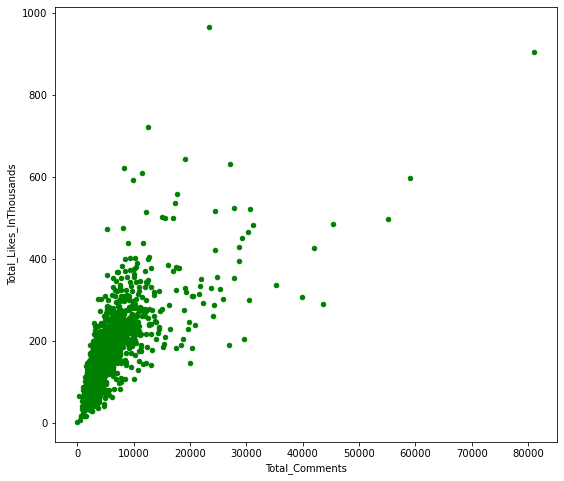

In [140]:
plotSctr = DataFrame_Comments_Likes.plot.scatter(x='Total_Comments',
                      y='Total_Likes_InThousands', c='green',
                      figsize=(9, 8))

#### second most like video has more like overall, we can clearly see that mostly user who likes the video also comments on the video.

### Comments Vs Likes Vs Views on video.

In [144]:
# Creating new data frame for analysis.
dataFrame_VLC = DataFrame[['Total_Comments']].copy()
dataFrame_VLC['Total_Likes_InThousands'] = DataFrame['Total_Likes']/1000
dataFrame_VLC['Total_Views_InMillions'] = (DataFrame['Total_Views']/CONST_MILLION)

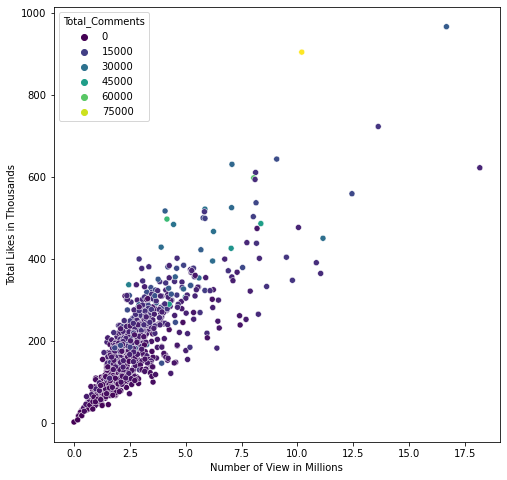

In [145]:
fig, ax = plt.subplots(figsize=(8, 8))
sctrPlot = sns.scatterplot(x='Total_Views_InMillions', y='Total_Likes_InThousands', hue="Total_Comments", data=dataFrame_VLC, ax=ax, palette = "viridis")
sctrPlot.set(xlabel='Number of View in Millions', ylabel='Total Likes in Thousands');

#### Video with highest comment has almost 10 million views and more than 800k Likes. Also, Video with highest like has second highest views but average comments in the video.

### Duration Analysis: Comparing Duration with Views

In [147]:
# Creating new data frame for analysis.
dataFrame_DurationView = DataFrame[['Duration_InMinutes']].copy()
dataFrame_DurationView['Total_Views_InMillions'] = (DataFrame['Total_Views']/CONST_MILLION)

(0.0, 60.0)

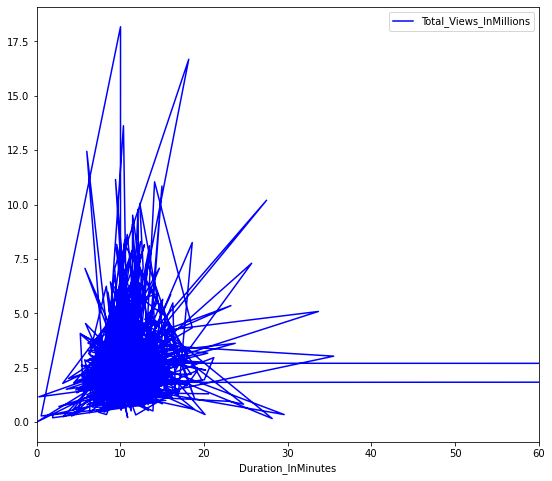

In [157]:
 plotSctr = dataFrame_DurationView.plot(x='Duration_InMinutes',
                      y='Total_Views_InMillions', c='blue',
                      figsize=(9, 8))
plotSctr.set_xlim(0,60)

#### Majority Video has length between 10 to 15 min, and has decent likes on those videos as well.

### PairPlot to check for correlation between features.

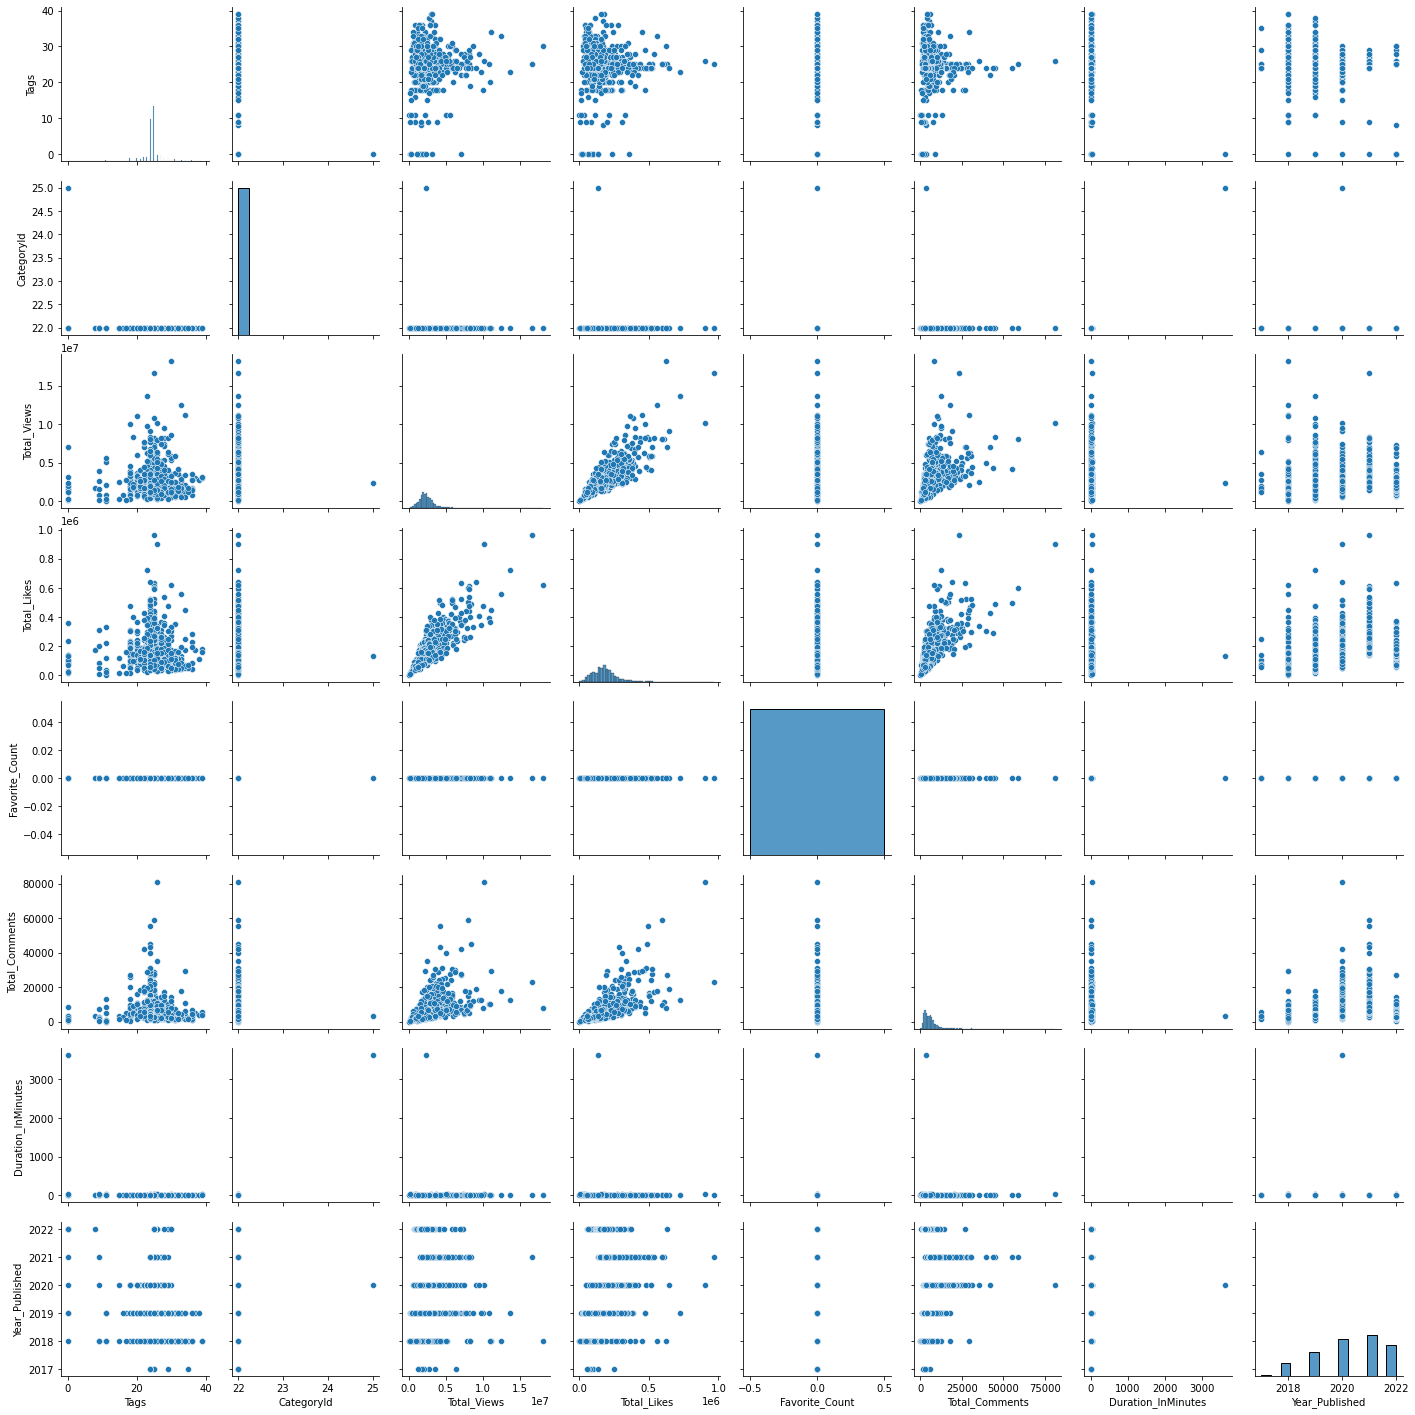

In [158]:
sns.pairplot(DataFrame)

### Conclusion:

#### In this assignment we looked on the analysis of a youtube channel vlogger "Flying_Beast", where we collected the data using google youtube API version 3.
#### To collect the data from API we need to generate token, and that token used to fetch the data from youtube. I've collected data of video under playlist upload. We cannot get the videos id so i've to do some exploration over the api to get the video id of that playlist. At first i've find the playlist id and then using that id, i've fetch details of video in that playlist, then using each video id i've requested api for details of specific video and stored in variable and then stored in csv format data.
#### After collecting the data I've read the data, perform data cleaning like remove nan values, null, duplicate values plus done pre-processing of data like extracting data from different columns ex: duration formatting update, pulished data and published time update.
#### Various analysis is performed using preprocessed data, 
#### 1. Top 10 videos - which show the maximum views on the video in the channel. Top video has title as "Best flight as a captian" and second which has one celebrity name John abhrham, which means youtube search engine gives best flight and John abhrham keywords preference.
#### 2. Word cloud for video titles - 3 major names, Rashi, Ritu and Papa, these words are very frequent in the title of videos and these names has special values in his life (daughter, wife and dad), that means most video contains these 3 person visuals.
#### 3. Word cloud for video description - Majority word focus on Instagram, Ritu Instagram, Gaurav Instagram and URL http. It seems that majority video decription has Instagram id mentioned with URL.
#### 4. Video Uploaded Analysis: Yearly Basis - There's a constant increase in uploading videos on to this channel in 2021 almost he uploaded 1 video daily. But there's huge dip in 2022 video upload. 28.2% in 2021 and 25% in 2020
#### 5. Videos Uploaded Analysis: On monthly basis per year after he created Channel - Analysis of video uploaded monthly as per year from 2017, March month has highest number (37) of upload followed by Feb 2021 by 34. From June 2020 to July 2021 he is uploading almost daily vlogs (videos), He is consistent during this period.
#### 6. Videos Uploaded Analysis: Monthly irrespective of year - which month he uploades the video most, March and May he uploaded video more, mostly travel video. That means, while travelling creates more videos.
#### 7. Views Analysis: Yearly Basis - Since he has uploaded more videos in 2021 that why total views on video in that time is more.
#### 8. Tag Analysis: Number of Tags Used in videos - Does hash tag adding to videos, reaches more views, it's not neccesary as we saw that more tag has not more reach to users that means less views but he uses average of 25 tags in almost every videos.
#### 9 - 12. Likes Analysis: Does more views on provides likes?, Comments Analysis: Does more views on provides more comments?, Comments vs Likes on video., Comments Vs Likes Vs Views on video, Duration Analysis: Comparing Duration with Views - These analysis is comparision b/w the views like and comments among each other. Majority all these are dependent on each other like, if video has more views then more than average like and comments are present.
#### 13. Pairplot - show the corrleation betweent the feature of the dataset.

#### A number of intereseting analysis can be performed to get more insights on the views, duration and timing of the uploading video. Also, we can compare this to different youtuber vlogger as well.